1.Julia is Botanist who is studying the Iris genus, She has collected the data of different the sepal length, sepal width, petal length, and petal width of various Iris flowers and wants to classify the flowers into their respective species based on their physical characteristics.

Julia decides to compare the performance of different machine learning algorithms for this task. She splits her data into a training set and a test set and trains several models, including Decision tree classifier, Logistic Regression, KNN classifier. Julia wants to the performance measures based on accuracy and speed of execution. Help her do the comparison of the classification algorithms


In [1]:
import pandas as pd
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['Class'] = y

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Class'], test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    execution_time = end_time - start_time
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Execution Time (s)": execution_time
    }

results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                     Accuracy  Execution Time (s)
Decision Tree             1.0            0.001973
Logistic Regression       1.0            0.006527
KNN                       1.0            0.001444


2.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

Example	Citations	Size	In Library	Price	Editions	Buy

1	Some	Small	No	Affordable	Few	No

2	Many	Big	No	Expensive	Many	Yes

3	Many	Medium	No	Expensive	Few	Yes

4	Many	Small	No	Affordable	Many	Yes


In [3]:
import pandas as pd
from io import StringIO

data = StringIO("""
Example,Citations,Size,In Library,Price,Editions,Buy
1,Some,Small,No,Affordable,Few,No
2,Many,Big,No,Expensive,Many,Yes
3,Many,Medium,No,Expensive,Few,Yes
4,Many,Small,No,Affordable,Many,Yes
""")

df = pd.read_csv(data)
attributes = df.iloc[:, 1:-1].values
target = df['Buy'].values

S = ['Ø'] * len(attributes[0])
G = [['?'] * len(attributes[0])]

def is_more_general(h1, h2):
    return all(h1[i] == '?' or h1[i] == h2[i] for i in range(len(h1)))

def update_S(example, S):
    for i in range(len(S)):
        if S[i] == 'Ø':
            S[i] = example[i]
        elif S[i] != example[i]:
            S[i] = '?'
    return S

def update_G(example, G, S):
    new_G = []
    for g in G:
        if not is_more_general(g, example):
            for i in range(len(g)):
                if g[i] == '?':
                    new_h = g[:]
                    new_h[i] = S[i] if S[i] != '?' else example[i]
                    new_G.append(new_h)
        else:
            new_G.append(g)
    return new_G

for i, example in enumerate(attributes):
    if target[i] == 'Yes':
        S = update_S(example, S)
        G = [g for g in G if is_more_general(g, S)]
    else:
        G = update_G(example, G, S)

print("Final Specific Hypothesis (S):", S)
print("Final General Hypotheses (G):", G)

Final Specific Hypothesis (S): ['Many', '?', 'No', '?', '?']
Final General Hypotheses (G): [['?', '?', '?', '?', '?']]


3.Develop a Python code for implementing Polynomial regression and show its performance

Mean Squared Error: 8.20
R² Score: 1.00


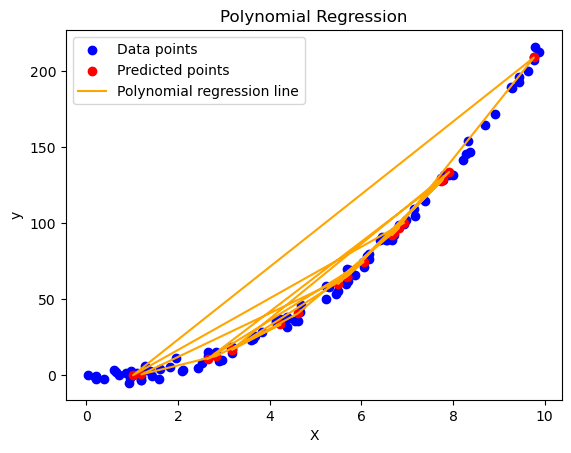

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X**2 - 3 * X + np.random.randn(100, 1) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_pred = model.predict(X_poly_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.scatter(X, y, color='blue', label='Data points')
plt.scatter(X_test, y_pred, color='red', label='Predicted points')
plt.plot(X_test, y_pred, color='orange', label='Polynomial regression line')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

4.Develop a Python code for implementing the KNN algorithm with an example.

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['Class'] = y

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Class'], test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



5.How is the Perceptron algorithm applied to the Iris flower classification problem?
Rani is a botanist who is studying the Iris genus. She has collected data on the sepal length, sepal width, petal length, and petal width of various Iris flowers and wants to classify the flowers into their respective species based on their physical characteristics. Anna decides to use the Perceptron algorithm for this task


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0, 1, 0)
        
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Perceptron(learning_rate=0.01, n_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 63.33%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



/Users/sunilshurajnthiyanandan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunilshurajnthiyanandan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunilshurajnthiyanandan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

6.Implement a Python program for  the most specific hypothesis using Find-S algorithm for the following given dataset and show the output:

Example	Citations	Size	In Library	Price	Editions	Buy

1	Some	Small	No	Affordable	Few	No

2	Many	Big	No	Expensive	Many	Yes

3	Many	Medium	No	Expensive	Few	Yes

4	Many	Small	No	Affordable	Many	Yes


In [9]:
import pandas as pd
from io import StringIO
import numpy as np

data = StringIO("""
Example,Citations,Size,In Library,Price,Editions,Buy
1,Some,Small,No,Affordable,Few,No
2,Many,Big,No,Expensive,Many,Yes
3,Many,Medium,No,Expensive,Few,Yes
4,Many,Small,No,Affordable,Many,Yes
""")

df = pd.read_csv(data)
attributes = df.iloc[:, 1:-1].values
target = df['Buy'].values

S = ['Ø'] * len(attributes[0])

for i, example in enumerate(attributes):
    if target[i] == 'Yes':
        if np.array_equal(S, ['Ø'] * len(attributes[0])):
            S = example
        else:
            for j in range(len(S)):
                if S[j] != example[j]:
                    S[j] = '?'

print("Most Specific Hypothesis (S):", S)

Most Specific Hypothesis (S): ['Many' '?' 'No' '?' '?']


7.Develop a Python code for implementing to compare Linear and Logistic regression and show its performance

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_linear_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_linear_pred)
r2 = r2_score(y_test, y_linear_pred)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

y_logistic_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_logistic_pred)
conf_matrix = confusion_matrix(y_test, y_logistic_pred)
class_report = classification_report(y_test, y_logistic_pred)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Linear Regression Performance:
Mean Squared Error: 0.04
R² Score: 0.95

Logistic Regression Performance:
Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



8.Develop a Python code for implementing the EM algorithm with an example.

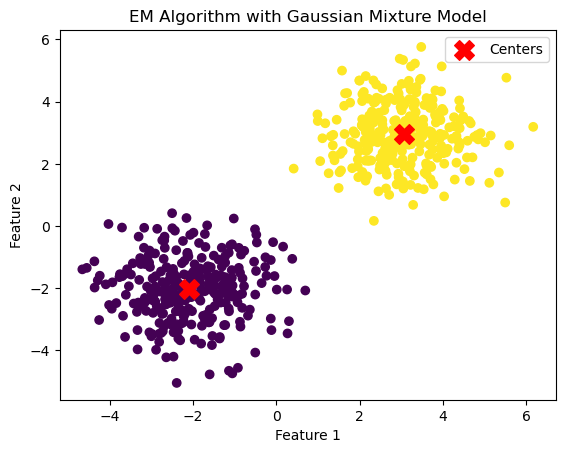

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(0)
n_samples = 300
n_components = 2

X1 = np.random.normal(loc=-2, scale=1, size=(n_samples, 2))
X2 = np.random.normal(loc=3, scale=1, size=(n_samples, 2))
X = np.vstack([X1, X2])

gmm = GaussianMixture(n_components=n_components, max_iter=100)
gmm.fit(X)

labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('EM Algorithm with Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.show()